In [1]:
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
#import preprocessing
from tqdm import tqdm
from io import BytesIO
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from imageio import imread
from skimage.transform import resize
from collections import Counter
import IPython.display as display

sn.set()

from sklearn.svm import SVC # SVC
from sklearn import metrics
from sklearn.utils import shuffle
from xgboost import XGBClassifier # XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import compute_class_weight
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier # AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# input data yang di peroleh di data momography
train_path = "E:/Breast Cancer Data/train/"
test_path = "E:/Breast Cancer Data/test"

In [4]:
# Take the number class
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  4


In [5]:
labels = ['benign','bwc','cancer','normal']

In [6]:
X_train_1 = []
y_train_1 = []
image_size = 100
for i in labels:
    folderPath = os.path.join('E:/Breast Cancer Data/train/',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size, image_size))
        X_train_1.append(img)
        y_train_1.append(i)
        
for i in labels:
    folderPath = os.path.join('E:/Breast Cancer Data/test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size,image_size))
        X_train_1.append(img)
        y_train_1.append(i)
        
X_train_1 = np.array(X_train_1)
y_train_1 = np.array(y_train_1)

100%|████████████████████████████████████████████████████████████████████████████████| 603/603 [00:52<00:00, 11.55it/s]


In [18]:
X_train_1, y_train_1 = shuffle(X_train_1, y_train_1 , random_state=101)

In [8]:
y_train_1_new = []
for i in y_train_1:
    y_train_1_new.append(labels.index(i))
y_train_1_new = y_train_1_new
y_train_1_new = tf.keras.utils.to_categorical(y_train_1_new)

In [19]:
import keras
from importlib import reload
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
reload(keras.models)

rows, cols,color = X_train_1[0].shape
# print(x_train[0].shape)

base_model = VGG16(input_shape= X_train_1[0].shape , weights='imagenet', include_top=False)
model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='sigmoid'))

for layer in base_model.layers:
    layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 dropout_3 (Dropout)         (None, 3, 3, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 batch_normalization_2 (Batc  (None, 4608)             18432     
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 64)                294976    
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                      

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=6,restore_best_weights=True, verbose=1)

In [21]:
efficientNet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(100,100,3))

In [22]:
x_train = X_train_1
y_train = y_train_1_new

In [23]:
model = efficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = model)

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', 
              metrics= ['accuracy'])

In [25]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("BreastCancerEfficientNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',verbose=1)

In [27]:
hist = model.fit(x_train,
                 y_train,
                 validation_split=0.1, 
                 epochs =64, 
                 verbose=1, 
                 batch_size=32)

Epoch 1/64
168/168 [==============================] - 532s 3s/step - loss: 1.1163 - accuracy: 0.4819 - val_loss: 1.1131 - val_accuracy: 0.5159
Epoch 2/64
168/168 [==============================] - 509s 3s/step - loss: 1.0923 - accuracy: 0.4909 - val_loss: 1.1259 - val_accuracy: 0.5209
Epoch 3/64
168/168 [==============================] - 520s 3s/step - loss: 1.0718 - accuracy: 0.4987 - val_loss: 1.1792 - val_accuracy: 0.4874
Epoch 4/64
168/168 [==============================] - 511s 3s/step - loss: 1.0417 - accuracy: 0.5134 - val_loss: 1.1430 - val_accuracy: 0.4472
Epoch 5/64
168/168 [==============================] - 531s 3s/step - loss: 0.9915 - accuracy: 0.5485 - val_loss: 1.4328 - val_accuracy: 0.2881
Epoch 6/64
168/168 [==============================] - 607s 4s/step - loss: 0.8995 - accuracy: 0.6031 - val_loss: 1.4387 - val_accuracy: 0.4556
Epoch 7/64
168/168 [==============================] - 625s 4s/step - loss: 0.7727 - accuracy: 0.6763 - val_loss: 1.8893 - val_accuracy: 0.3250

Epoch 58/64
168/168 [==============================] - 588s 4s/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 4.3204 - val_accuracy: 0.4472
Epoch 59/64
168/168 [==============================] - 585s 3s/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 3.8389 - val_accuracy: 0.3886
Epoch 60/64
168/168 [==============================] - 606s 4s/step - loss: 0.0373 - accuracy: 0.9870 - val_loss: 4.4758 - val_accuracy: 0.4372
Epoch 61/64
168/168 [==============================] - 585s 3s/step - loss: 0.0567 - accuracy: 0.9806 - val_loss: 3.5285 - val_accuracy: 0.4104
Epoch 62/64
168/168 [==============================] - 573s 3s/step - loss: 0.0331 - accuracy: 0.9884 - val_loss: 4.3496 - val_accuracy: 0.4439
Epoch 63/64
168/168 [==============================] - 616s 4s/step - loss: 0.0618 - accuracy: 0.9782 - val_loss: 3.5796 - val_accuracy: 0.4372
Epoch 64/64
168/168 [==============================] - 704s 4s/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 3.2633 - val_accuracy:

In [28]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


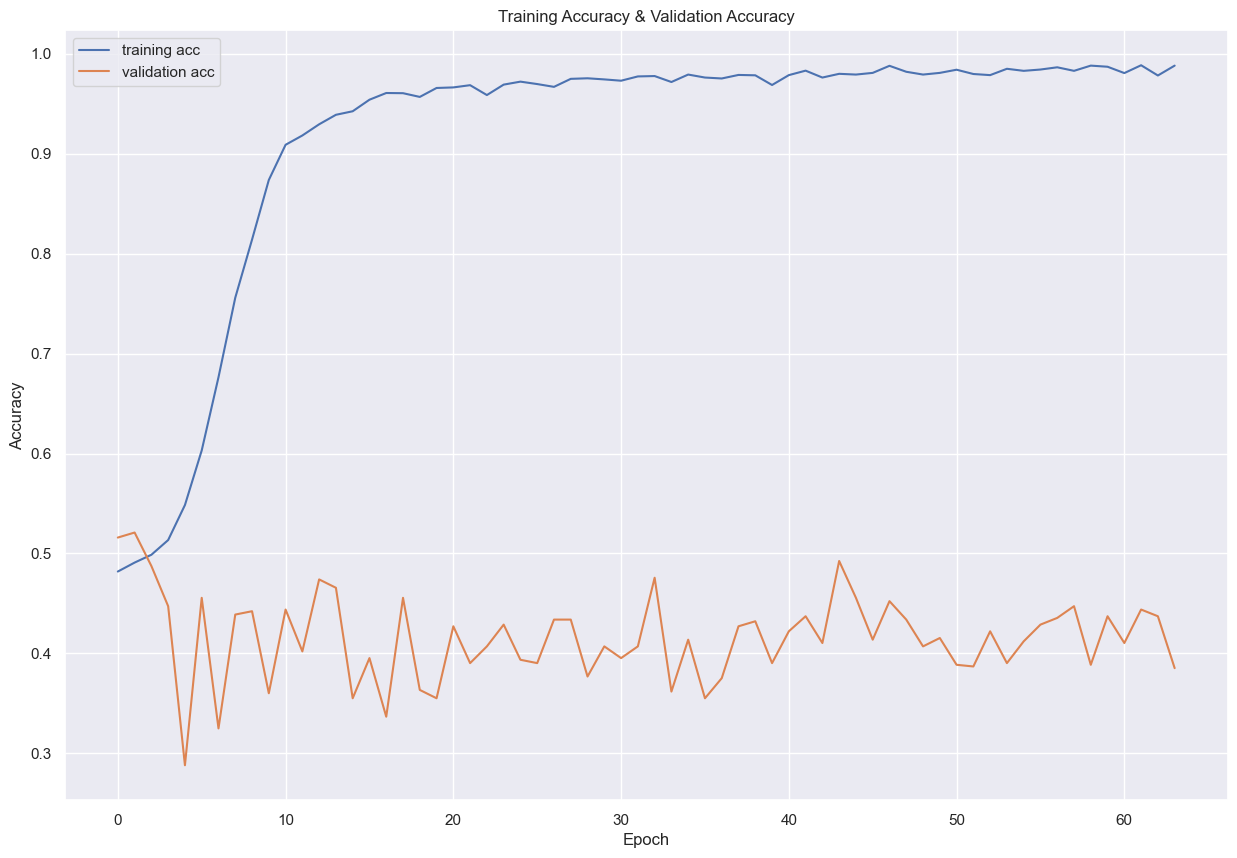

In [29]:
plt.figure(figsize=(15,10))
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()